# 1 Author
**Student Name**: Kaushal Yadav <br>
**Student ID**: 231030364



# 2 Problem formulation

The problem I wish to address is for a machine to be able to distinguish between a healthy dish and unhealthy dish just by using the list of ingredients and information about whether it was or is going to be prepared at home or not.
Possible areas of application are:
1. Integration of model's capabilities with current computer vision prowess to form an app that can process a picture of all the ingredients and help a user track the healthiness of their dishes.
1. Integration with computer vision for dietary feedback on a user's diet.
1. Creating personalised user dietary feedback in calorie tracking apps.

This model has wide range of application areas in dietary monitering and helping individuals make informed decisions.
As users increasingly seek personalized and technology-driven solutions for their well-being, this model aligns with the growing demand for accessible and actionable nutritional information, all made available in just a few clicks. <br>
It is a step taken to solve the complex nutritional puzzle.

# 3 Machine Learning pipeline

My pipeline will essentially take a list of ingredients and information about where the dish was prepared as input and return a label, which will either be "healthy" or "not_healthy." Let's take a quick look inside the pipeline:
1. Pre-processing: A list of ingredients seems intuitive enough, but we may still find ingredients that are not aligned with how we want the ingredients to be. It's possible to for some ingredients to not make sense. So we would have to find a way to "normalize" them or make them more consistent and that would involve:
    * Lowercasing all the ingredients (casefolding)
    * Checking for unwanted/unexplainable characters in the ingredients and either replacing them using greedy matching or discarding them altogether.
    * Turning the list into a format that can be parsed easily during vector creation.
1. Feature extraction:
  * Turning ingredients into vectors and assigning weights.
  * Encoding any other attributes that we may want to use to train our model. Example: Home or not home, etc.
For this model specifically, we will skip using the image array because it is possible to miss out on fine unhealthy ingredients that may not be apparent in the dish, thus leading to misleading predictions and thus, a lot more misinformed dietary decisions. For example, Ajinomoto or monosodium glutamate (MSG).
1. The feature vector is then passed to the trained model and -

This is where my pipeline ends and what comes out is either 1 for "healthy" or 0 for "not_healthy."


# 4 Transformation stage

For our machine learning model, we find that instances characterized as "Neutral", specifically those with a healthiness rating integer of 3, hold limited relevance for our intended application. The rationale behind this decision lies in the consideration that individuals are less likely to seek information about the neutrality of a dish. Consequently, we intend to exclude instances with a healthiness rating of "Neutral" during subsequent stages of our model development, focusing our analysis on more distinctive healthiness classifications.

## Basic attribute Transformation:
1. Ingredients:
    * Lowercasing all the ingredients (casefolding)
    * Finding ingredients with invalid characters inside them and replacing them with with valid substring ingredient with maximum length.
    * Trying to change ingredients that are more than three words to their base form to try and make the vectors more consistent.
    * Changing to a format which allows easy parsing of ingredients for vectorization
1. Home_not_home: Encoding/creating home_not_home labels

# 5 Modelling

I tried out the models below:
1. LinearSVC (Linear Support Vector Machine):
  * Could be performing worse due to non-linearity of relationship between bag-of-words values of ingredient or "bag-of-ingredients" and binary home not home feature.
  * Became complex due to high number of hyper parameters to be tuned like regularisation, cost, etc.

#### RandomForestClassifier: Final choice
Reason:
1. It was able to capture complexity more effectively.
1. Random forest is excellent at automatically weighing the importance of individual words, while linearsvc might be treating all features equally.
1. Easier to work with because it has fewer number of hyperparameters to be tuned. Or in our case, none.
1. High test accuracy.

# 6 Methodology
* The splitting of the data is done using the the pre-existing Benchmark_A column present in the dataframe, which consists the "Train" and "Test" labels.
* The train data is used for training and the test data, no surprises, for testing. The results are assessed in a simple way using the following metrics. The list starts from the most important and then slowly moves on the least:
    1. (Pre-existing) Confusion Matrix: It often helped me figure out and realise if and when I was fooling myself by creating and using a feature that had an illogical bias, which happened a lot during this process of trial and error. It also made me think about and consider whether there was a class imbalance in my training and/or testing data.
    1. Precision and recall to further highlight any biases
    1. Test accuracy: Helped me check how well my choice of classifier and feature worked to classify random real world images with real world noise or variability, so to speak.
    3. Train accuracy: Useful for detecting instances of overfitting in the model.

# 7 Dataset
* I utilized a dataset originating from students, myself included, enrolled in the QMUL MSc FT Big Data Science course, batch of 2024. The dataset comprises features such as the diet type (vegetarian or non-vegetarian), original cuisine, specific cuisine, dish name, home or restaurant preparation, ingredients, healthiness rating (categorized and encoded), likeness rating (categorized and encoded), and a benchmark indicating whether a sample is designated for training or testing. Additionally, each sample is indexed with the name of the corresponding image, ranging from "000001.jpg" to "03250.jpg."

* To enhance the dataset, I introduced additional columns, including a binary indicator for healthy or not healthy (1 for healthiness ratings 1 and 2, 0 for ratings 4 and 5, with neutral dishes, rating 3, discarded). I preprocessed the ingredients by converting them into space-separated format for ease of vectorization. Another added feature, "Home_not_home," was created with a binary representation (1 for home, 0 for not_home) achieved through substring matching with instances containing "home." Additionally, I included a column "Num_ingreds" just out of curiosity and sake of experimentation, denoting the number of ingredients.

* To ensure a balanced dataset for healthy and unhealthy instances, I applied filtering. The final dataset underwent an 80-20 train-test split. For the predictive model, I employed the LinearSVC algorithm, using a column transformer that includes CountVectorized comma-separated ingredients and a pass-through for the Home_not_home column. This approach allowed the model to predict the healthiness of dishes based on ingredients and home preparation status.

Special thanks to Nikesh Bajaj and Jesús Requena Carrión for collaborating on, creating and maintaining the mlend library below where Yummy_dataset along with a lot of other fun datasets can be found and downloaded from.<br>
More information here:
[MLEND Datasets documentation](https://mlend.readthedocs.io/en/latest/)


In [1]:
!pip install --quiet mlend --upgrade

#### Basic dependenies:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mlend
from mlend import download_yummy_small, yummy_small_load, yummy_load, download_yummy

import os, sys, re, pickle, glob

In [3]:
from google.colab import drive
drive.mount("/content/MyDrive")

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


#### Downloading the data:

In [4]:
subset = {}

#try this first
# datadir = download_yummy(save_to = '/content/drive/MyDrive/Data1/MLEnd1', subset = subset,verbose=1,debug_mode = True, overwrite = False)

#uncomment this if the above throws an error
datadir, FILE_ERROR = download_yummy(save_to = '/content/drive/MyDrive/Data1/MLEnd1', subset = subset,verbose=1,debug_mode = True, overwrite = False)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


In [5]:
#let's get the map for the encoded attributes
TrainSet1, TestSet1, MAPs1 = yummy_load(datadir_main = datadir,encode_labels=True,)

Total 3250 found in /content/drive/MyDrive/Data1/MLEnd1/yummy/MLEndYD_images/


In [6]:
print(f"the following is the map for healthiness rating:")
display(MAPs1["Healthiness_rating"])

the following is the map for healthiness rating:


{'very_unhealthy': 1,
 'unhealthy': 2,
 'neutral': 3,
 'healthy': 4,
 'very_healthy': 5}

#### Reading the data and some exploratory analysis:

In [7]:
#reading the dataset
MLENDYD_df1 = pd.read_csv('/content/drive/MyDrive/Data1/MLEnd1/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
display(MLENDYD_df1.head(3))

#extracting and saving some list of ingredients before discarding the neutral dish instances that we can then use later during feature engineering of our ingredients
ingreds0 = [i for j in [i.split(",") for i in MLENDYD_df1.Ingredients] for i in j if i != ""]
invalid_pattern0 = re.compile(r'[^a-zA-Z0-9_]+')
valid_ingreds_list0 = [i for i in ingreds0 if not invalid_pattern0.search(i)]
long_pattern0 = re.compile(r'(?:.*_){3,}')
short_ingreds0 = [i for i in valid_ingreds_list0 if not long_pattern0.search(i)]

#filtering out dishes that are neither healthy nor unhealthy, that is, neutral.
MLENDYD_df1 = MLENDYD_df1[MLENDYD_df1.Healthiness_rating_int.isin([1, 2, 4, 5])]
print(f"\nTotal number of rows after removing the 'neutral' dishes: {MLENDYD_df1.shape[0]}\n")

#list of all the ingredients
ingreds = [i for j in [i.split(",") for i in MLENDYD_df1.Ingredients] for i in j if i != ""]
print(f"Total number of unique ingredients in MLENDYD_df1: {len(set(ingreds))}")
print(f"Total number of ingredients in MLENDYD_df1: {len(ingreds)}\n")

#checking the number of ingredients that have an invalid character inside it
invalid_pattern = re.compile(r'[^a-zA-Z0-9_]+')
invalid_ingredients = [i for i in ingreds if invalid_pattern.search(i)]

#getting a list of all valid ingredients with either numbers or aplhabets or underscores
valid_ingreds_list = [i for i in ingreds if i not in invalid_ingredients]

#printing the results
print(f"Unique invalid ingredients:")
display(set(invalid_ingredients[:5]))
print("...\n"*3)
print(f"Number of unique invalid ingredients: {len(set(invalid_ingredients))}")
print(f"Total number of invalid ingredients: {len(invalid_ingredients)}")

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train



Total number of rows after removing the 'neutral' dishes: 2464

Total number of unique ingredients in MLENDYD_df1: 2873
Total number of ingredients in MLENDYD_df1: 17544

Unique invalid ingredients:


{'chopped\n1/2_cup_mixed_vegetables_(carrots',
 'etc.)',
 'finely_chopped\n1_small_tomato',
 'ginger_&_garlic_paste',
 'ingredients:\nfor_cooking_rice:\n1_cup_rice_(any_variety_such_as_sona_masoori_or_basmati)\n2_cups_water\nfor_sambar:\n1/2_cup_toor_dal_(split_pigeon_peas)\n1_small_lemon-sized_tamarind_ball\n1_small_onion'}

...
...
...

Number of unique invalid ingredients: 426
Total number of invalid ingredients: 565


The total number of unique ingredients are more than the number of datapoints we have, that is a bit of a problem.

# 8 Results

#### Invalid ingredient greedy matching function:
Let's develop a function that uses a "greedy matching" approach to replace invalid ingredients. We can indentify valid candidates for each invalid ingredient and replace it with the longest matching valid ingredient in its lowercased form.

In [8]:
def replace_invalid_strings(ingredients_list, pattern, valid_ingred): #valid_ingred_list was created in the previous cell
    replacements = {}

    #the pattern that we do not want inside our strings
    invalid_pattern = re.compile(pattern)

    #finding all the invalid ingredients in the given list
    invalid_ingreds = [i for i in ingredients_list if invalid_pattern.search(i)]

    #for each invalid ingredient we
    for invalid in invalid_ingreds:
        invalid_lower = invalid.lower()
        #extract all the valid ingredients that are a substring inside the invalid ingred
        valid_candidates = [v for v in valid_ingred if v.lower() in invalid_lower]
        if valid_candidates:
            #finding the longest matching ingredient
            max_length_valid = max(valid_candidates, key=len)
            #mapping it inside a dictionary
            replacements[invalid] = max_length_valid

    #this will ensure that the ingredient that do have a match get replaced and the ones that don't remain the same
    result = [replacements.get(ingredient, ingredient) for ingredient in ingredients_list]

    return result

In [9]:
#taking the function out for a spin on current global list of ingredients
fixed_ingred = replace_invalid_strings(ingreds, pattern = r'[^a-zA-Z0-9_]+', valid_ingred = valid_ingreds_list0)

#checking the number of ingredients that have an invalid character inside it
invalid_pattern = re.compile(r'[^a-zA-Z0-9_]+')
invalid_ingreds_new = [i for i in fixed_ingred if invalid_pattern.search(i)]

#printing the results
print(f"Invalid ingredients that can not be saved: \n{set(invalid_ingreds_new)}")
print(f"Number of unique unfixable invalid ingreds: {len(set(invalid_ingreds_new))}")
print(f"Total number of unfixable invalid ingreds: {len(invalid_ingreds_new)}")

Invalid ingredients that can not be saved: 
{'chicory_powder_(optional', '8_oz_(about_225g)_chow_mein', 'lady’s_finger', '_and_cut_into_1-inch_pieces', 'mloukhiyeah(the_leaf)', 'peri-peri', 'jalapeños', 'ingredients:\nfor_the_filling:\n2_boneless', 'namkeen_(indian_savory)', 'for_a_hint_of_sweetness)', "kellogg's_chocos", 'blue_berry’s'}
Number of unique unfixable invalid ingreds: 12
Total number of unfixable invalid ingreds: 15


I am honestly glad that 'lady's_finger' wasn't "saved" or "fixed".

Now let's implement it to the Ingredients column in our dataset to try and reduce dimension using feature engineering.

In [10]:
#changing ingredients with unwanted charaters (that is, anything other than numbers, alphabets and underscores) with ones that don't have it
MLENDYD_df1["Ingredients"] = [",".join(replace_invalid_strings(ingred_str.split(","), pattern = r'[^a-zA-Z0-9_]+', valid_ingred = valid_ingreds_list0)) for ingred_str in MLENDYD_df1.Ingredients]

There is a flaw in the above feature engineering method, some of these "unfixable" ingredients may have more than one unique match, that is, two different ingredients, in which case my function would only consider one ingredient of longest length.<br>
For example: 'chicken_drumstick_stock' might only get matched with drumstick instead of stock which should have been the main term here. But '2_red_chilli' would accurately get matched with red_chilli instead of just chilli.<br>
It is a tradeoff.

Let's now consider ingredients that are unusually long, these would be the ingredients with 3 or more underscores, that is, 4 or more words.

In [11]:
#using regex to filter ingredients
long_pattern = re.compile(r'(?:.*_){3,}')

#new list of ingreds after updation
ingreds = [i for j in [i.split(",") for i in MLENDYD_df1.Ingredients] for i in j if i != ""]

#extracting ingredients that are longer than 4 words
long_ingreds = [i for i in ingreds if long_pattern.search(i)]
short_ingreds = [i for i in ingreds if i not in long_ingreds] #we can use this later when replaceing long ingredients

#printing the results
print(f'Ingredients with three or more underscores: {len(set(long_ingreds))}\n', long_ingreds, "\n")
print(f'Ingredients with two or fewer underscores: {len(set(short_ingreds))}\n', short_ingreds)

Ingredients with three or more underscores: 160
 ['chopped_fresh_coriander_leaves', 'lamb_or_goat_or_beef_mince', 'honey_and_garlic_sauce', 'white_long_grain_rice', 'mustard_and_cumin_seeds', 'ginger_and_garlic_paste', '1_teaspoon_coriander_powder', '_washed_and_drained', '2_tablespoons_vegetable_oil', '1_teaspoon_cumin_seeds', '1_teaspoon_coriander_powder', 'fresh_coriander_leaves_for_garnish', 'peri_peri_extra_hot_chicken', 'mint_leaves_and_oil', 'corriander_powder_and_oil', 'scrambled_eggs_mushrooms_and_chicken', 'paste_of_chickpea_flor', 'chopped_fresh_coriander_leaves', 'lemon_and_herb_peri_sauce', 'fresh_coriander_leaves_for_garnish', '2_tablespoons_vegetable_oil', '1_teaspoon_cumin_seeds', '1_teaspoon_coriander_powder', '_fresh_or_frozen', '1_teaspoon_garam_masala', 'fresh_coriander_leaves_for_garnish', 'refined_flour_and_indian_spices', 'almond_milk_or_any_preferred_milk', 'other_greens_like_fenugreek_leaves', 'tikka_masala_and_rice', 'chicken_with_a_spiced_tomato_and_butter', 

It is apparent that long_grain_rice could simply be rice and lamb_or_goat_or_beef_mince should just be beef_mince or mince. Let's use regex pattern to find ingredients with 4 or more words and try to reduce them to their base forms.

In [12]:
#now trying to reduce unusually long ingredients with shorter more accurate versions
MLENDYD_df1["Ingredients"] = [",".join(replace_invalid_strings(ingred_str.split(","), pattern = r'(?:.*_){3,}', valid_ingred = short_ingreds0)) for ingred_str in MLENDYD_df1.Ingredients]

For the final step, lets consider lemmatizing ingredients to their base singular form.

In [13]:
#installing and importing dependencies
!pip install --quiet nltk
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
#initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

#example to demonstrate that it won't be as harsh as stemming, it would only converting words without underscores to their dictionary form
Words = ['peanuts', 'red_chilli_powder']

Lemmas = [lemmatizer.lemmatize(word) for word in Words]
for i in range(len(Words)):
  print(f"\t{i+1}) {Words[i]} becomes: {Lemmas[i]}\n")

	1) peanuts becomes: peanut

	2) red_chilli_powder becomes: red_chilli_powder



In [15]:
#implementing lemmatization to our ingredients and updating the ingredients column
MLENDYD_df1["Ingredients"] = [",".join([lemmatizer.lemmatize(ingred) for ingred in ingred_str.split(",")]) for ingred_str in MLENDYD_df1.Ingredients]

Now that we have engineered the ingredients, let's create a mask and exclude all the ingredients that are still present in an invalid format.

In [16]:
#defining a regular expression pattern for valid characters
valid_pattern = r'^[a-zA-Z0-9_,]+$'

#creating mask for all the samples with valid ingredients
mask = MLENDYD_df1['Ingredients'].str.contains(valid_pattern)

#applying the mask to filter the MLENDYD_df1
yd_df1 = MLENDYD_df1[mask]

#displaying the filtered dataset
display(yd_df1.head(3))
print(f"Number of instances in the filtered dataset: {yd_df1.shape[0]}\n")

#new total number of ingredients
ingreds = [i for j in [i.split(",") for i in yd_df1.Ingredients] for i in j if i != ""]
print(f"Total number of unique ingredients in yd_df1: {len(set(ingreds))}")
print(f"Total number of ingredients in yd_df1: {len(ingreds)}\n")

#double checking if there are any invalid ingredients left
invalid_pattern = re.compile(r'[^a-zA-Z0-9_]+')
invalid_ingreds = [i for i in ingreds if invalid_pattern.search(i)]
print(f"Unique invalid ingredients: \n{set(invalid_ingreds)}")
print(f"Number of unique invalid ingreds: {len(set(invalid_ingreds))}")
print(f"Total number of invalid ingreds: {len(invalid_ingreds)}")

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"egg,bacon,hash_brown,tomato,bread,tomato,baked...",unhealthy,2.0,like,4.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train


Number of instances in the filtered dataset: 2449

Total number of unique ingredients in yd_df1: 2206
Total number of ingredients in yd_df1: 17386

Unique invalid ingredients: 
set()
Number of unique invalid ingreds: 0
Total number of invalid ingreds: 0


The number of unique ingredients is lesser than the number of datapoints we have, but we still haven't achieved class balance, it's too soon to celebrate.

Let's now inspect the ingredients and their counts in the filtered dataset to understand what features are going to be passed to the model.

In [17]:
#creating a list of unique ingredients and their counts
ingred_count = [
    (ingredient, ingreds.count(ingredient)) #format in which i want it
    for ingredient in set(ingreds) #the set of ingredients that have to be counted
    if all(char.isalnum() or char == "_" for char in ingredient) and ingredient != ""  #shoud either be alphanumeric or contain _ (underscores) but can not be an empty string
]

#sorting the count
sorted_count = sorted(ingred_count, key = lambda x: x[1], reverse = True)
print(f"let's have a look at the first 10 most frequent ingredients and their counts:")
display(sorted_count[:10])

let's have a look at the first 10 most frequent ingredients and their counts:


[('salt', 908),
 ('onion', 773),
 ('tomato', 555),
 ('rice', 389),
 ('oil', 360),
 ('garlic', 357),
 ('chicken', 336),
 ('egg', 305),
 ('potato', 300),
 ('water', 249)]

Let's now consider the option of using ingredient that have a minimumn count of 2 for better results. For that, we would need to consider how many ingredients have a count of 1 and then we can make a decision.

In [18]:
len_1_ingred = [(ingredient, count) for ingredient, count in sorted_count if count == 1]
print(f"total number ingredients that only appear once in the entire dataset: {len(len_1_ingred)}\n")
print(f"first 10 ingredients that appear in the entire dataset only once:")
display(len_1_ingred[:10])

total number ingredients that only appear once in the entire dataset: 1227

first 10 ingredients that appear in the entire dataset only once:


[('sweetyougut', 1),
 ('plant_based_burger', 1),
 ('curry_leafs', 1),
 ('fresh_double_cream', 1),
 ('biryani_spice', 1),
 ('artichoke', 1),
 ('pickled_pepper', 1),
 ('breaded_cod', 1),
 ('guacamole', 1),
 ('cocktail_sauce', 1)]

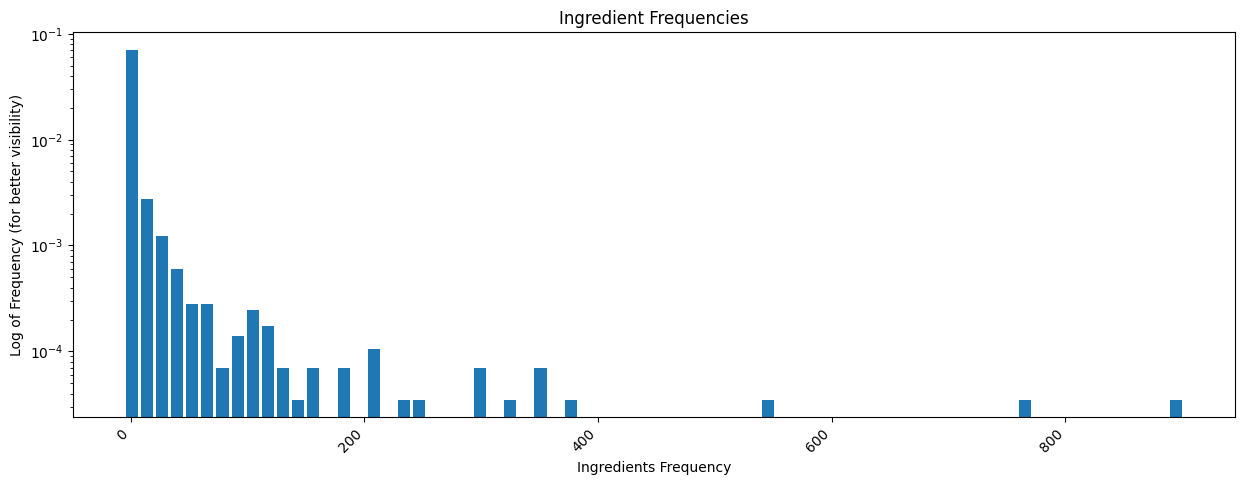

In [19]:
# Extracting counts and ingredients
ingredients_list, counts = zip(*ingred_count)

# Creating bins based on the total count of ingredients
bins = range(1, max(counts) + 2)

# Plotting the histogram-like bar plot
plt.figure(figsize = (15, 5))
plt.hist(counts, bins = 70, align='left', rwidth=0.8, density = True)
plt.xlabel('Ingredients Frequency')
plt.ylabel('Log of Frequency (for better visibility)')
plt.title('Ingredient Frequencies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yscale('log')
plt.show()

The plot above show that an exponentially (Literally. We used a log scale in the plot.) large number of ingredients have a count very close to 1. It's a lot of information that we can not afford to lose. We can not discard ingredients that only appear once as they also seem to be named reasonably.
For example, "chicken_fat" is named correctly.

In [20]:
#extracting unique Home_or_restaurant values
h_or_r = [i for i in yd_df1.Home_or_restaurant]

#checking the versions of 'home' so that they can all be generalized as 'home' later
h_versions = [i for i in yd_df1.Home_or_restaurant if "home" in i.lower()]

#printing the respective values
print(f"let's have a look at the unique values we see in the Home_or_restaurant column: \n{set(h_or_r)}")
print(f"total number of unique values inside the Home_or_restaurant column: {len(set(h_or_r))}\n")
print(f"let's have a look at the unique values with 'home' inside them: \n{set(h_versions)}")
print(f"total number of unique values with 'home' inside them: {len(set(h_versions))}\n")

let's have a look at the unique values we see in the Home_or_restaurant column: 
{'gdk', 'emirates_restaurant', 'vasiniko', 'bananatree', 'mexican_dining_otra', 'dashi_chazuke', 'mcdonalds', 'restraurant', "mcdonald's", 'shake_shack', "sainsbury's", 'erhan', 'hiba_restraunt', 'resturant', 'nirala_sweets', 'unagiya', 'jahan', 'anjappar_restaurant', 'tonkotsu', 'asda', 'dalchini', 'my_old_place', "sam's_chicken", 'itsu', 'saravana_bhavan', 'wasabi', 'mian', 'spag_bowl(bow)', 'super_mario_emin_usta', 'jrc_global_buffet', 'tortilla', 'delamina_east', 'morrisons', 'cake_box', 'afghan_grill', 'albura_kathisma_bistro', 'homemade', 'ymca_indian_restaurant', 'm&s_simply_food', 'kujawiak', 'german_doner_kebab_watford', "nando's", 'pizza_hut', '36_street_food', "nando's_euston_station", "maamala's", 'pizza_union', 'roosters_piri_piri', 'm&s_food_hall_euston_station', 'eminonu_borekcisi', 'tiantian', 'lidl', 'k.o_kebabish', 'burger_and_chop', 'nandos', 'resturaunt', 'fried_&_grilled', 'taco_bell',

The instance "home_cafe" isn't home, we can simply exculde it in the condition we apply. All the others can be generalized as "home". Let's now add new columns with the following information:
1. binary information about wether a dish was made at home or not
1. binary informaiton about wether a dish is healthy or not

In [21]:
#this step is so that creating a new column does not throw an error
yd_df1 = yd_df1.copy()

#creating a new Home_not_home column
yd_df1["Home_not_home"] = [1 if "home" in i.lower() and "caf" not in i.lower() else 0 for i in yd_df1.Home_or_restaurant]

#creating a new Healthy_not_healthy column
yd_df1["Healthy_not_healthy"] = [0 if i == 1 or i == 2 else 1 for i in yd_df1.Healthiness_rating_int]

#displaying the updated df
display(yd_df1.head(3))

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,Home_not_home,Healthy_not_healthy
filename,,,,,,,,,,,,,
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"egg,bacon,hash_brown,tomato,bread,tomato,baked...",unhealthy,2.0,like,4.0,Train,1,0
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train,1,0
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train,1,1


Home_not_home map:<br>
1: home <br>
0: not_home <br>

The sample size is still adequate after discarding some of samples.
Let's now add a few more columns:
1. Pre_processed_ingredients: We don't want weight being assigned to an empty space ''. We remove it from the list of ingredients so that it does not confuse our model. We will also now separting ingredients by single spaces so that it is easy to parse them. We could get an instance of empty spaces as ingredients when a person types two commas instead of one by mistake or otherwise.

1. Num_ingreds: This is an additional feature that tracks the number of ingrediets.

In [22]:
#extracting the string from the Ingredients column and turning it into a list of list of ingredients
ingredients_list = [i.split(",") for i in yd_df1.Ingredients]

#calculating the number of instances that had empty spaces inside them as an ingredient
#this could happen when a person types two commas instead of one by mistake or otherwise
empty_spaces = [True for i in ingredients_list if "" in i]
print(f"Number of instances with empty spaces in their ingredients string: {sum(empty_spaces)}\n")

#removing all the empty space
revised_list = [[j for j in i if j != ""] for i in ingredients_list]

#creating a new column with pre-processed ingredients with no empty spaces
yd_df1["Preprocessed_ingredients"] = [" ".join(i) for i in revised_list]
yd_df1["Num_ingreds"] = [len(i) for i in revised_list]

display(yd_df1.head(3))

Number of instances with empty spaces in their ingredients string: 116



,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,Home_not_home,Healthy_not_healthy,Preprocessed_ingredients,Num_ingreds
filename,,,,,,,,,,,,,,,
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"egg,bacon,hash_brown,tomato,bread,tomato,baked...",unhealthy,2.0,like,4.0,Train,1,0,egg bacon hash_brown tomato bread tomato baked...,7
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train,1,0,sugar water khoya milk salt oil cardamon ghee,8
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train,1,1,chicken lemon turmeric garam_masala coriander_...,7


Let's now check if the Healthiness_rating attribute has any nan values so that it can be handled accordingly.

In [23]:
#checking for nan values
display(yd_df1[yd_df1.Healthiness_rating_int.isna()])

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,Home_not_home,Healthy_not_healthy,Preprocessed_ingredients,Num_ingreds
filename,,,,,,,,,,,,,,,


No nan values, let's move on.

#### Checking and addressing class imbalance:
We will now move on to checking and ensuring class balance and then making sure we have a decent train test split.

In [24]:
print(f"the number of train samples in the dataset: {yd_df1[yd_df1.Benchmark_A == 'Train'].shape[0]}")
print(f"the number of test samples in the dataset: {yd_df1[yd_df1.Benchmark_A == 'Test'].shape[0]}\n")

print(f"the number of 'Healthy' samples in the dataset: {yd_df1[yd_df1.Healthy_not_healthy == 1].shape[0]}")
print(f"the number of 'Unhealthy' samples in the dataset: {yd_df1[yd_df1.Healthy_not_healthy == 0].shape[0]}\n")

print(f"the percentage of 'Healthy' samples in the dataset: {yd_df1[yd_df1.Healthy_not_healthy == 1].shape[0]/(yd_df1[yd_df1.Healthy_not_healthy == 1].shape[0] + yd_df1[yd_df1.Healthy_not_healthy == 0].shape[0])*100:.2f}%")
print(f"the percentage of 'Unhealthy' samples in the dataset: {yd_df1[yd_df1.Healthy_not_healthy == 0].shape[0]/(yd_df1[yd_df1.Healthy_not_healthy == 1].shape[0] + yd_df1[yd_df1.Healthy_not_healthy == 0].shape[0])*100:.2f}%")

the number of train samples in the dataset: 1721
the number of test samples in the dataset: 728

the number of 'Healthy' samples in the dataset: 1863
the number of 'Unhealthy' samples in the dataset: 586

the percentage of 'Healthy' samples in the dataset: 76.07%
the percentage of 'Unhealthy' samples in the dataset: 23.93%


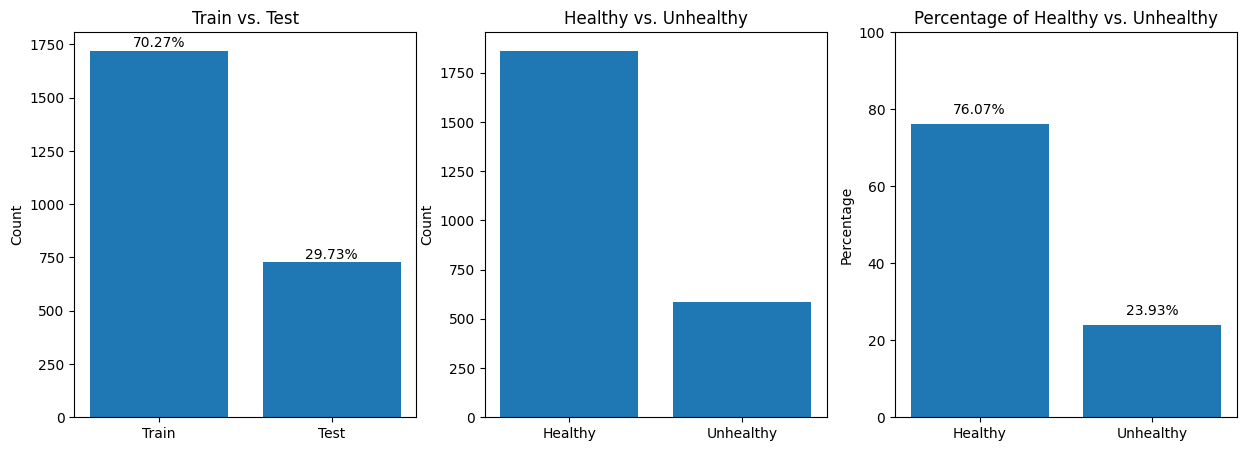

In [25]:
#calculating
train_test_counts = [yd_df1[yd_df1.Benchmark_A == 'Train'].shape[0], yd_df1[yd_df1.Benchmark_A == 'Test'].shape[0]]
healthy_unhealthy_counts = [yd_df1[yd_df1.Healthy_not_healthy == 1].shape[0], yd_df1[yd_df1.Healthy_not_healthy == 0].shape[0]]
percentage_healthy = (healthy_unhealthy_counts[0] / sum(healthy_unhealthy_counts)) * 100
percentage_unhealthy = (healthy_unhealthy_counts[1] / sum(healthy_unhealthy_counts)) * 100
total_samples = sum(train_test_counts)
percentage_train = (train_test_counts[0] / total_samples) * 100
percentage_test = (train_test_counts[1] / total_samples) * 100

#plotting the same
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#plot 1: train vs test
bars = ax[0].bar(["Train", "Test"], train_test_counts)
ax[0].set_title("Train vs. Test")
ax[0].set_ylabel("Count")

#plot 2: healthy vs unhealthy
ax[1].bar(["Healthy", "Unhealthy"], healthy_unhealthy_counts)
ax[1].set_title("Healthy vs. Unhealthy")
ax[1].set_ylabel("Count")

#plot 3: percentage of healthy vs unhealthy
ax[2].bar(["Healthy", "Unhealthy"], [percentage_healthy, percentage_unhealthy])
ax[2].set_title("Percentage of Healthy vs. Unhealthy")
ax[2].set_ylim(0, 100)  # Set y-axis limit to 0-100 for percentage
ax[2].set_ylabel("Percentage")

#displaying the percentages on top of the bars in the first subplot
for bar, percentage in zip(bars, [percentage_train, percentage_test]):
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, height + 2, f"{percentage:.2f}%", ha='center', va='bottom')

#displaying the percentages on top of the bars in the third subplot
for i, percentage in enumerate([percentage_healthy, percentage_unhealthy]):
    ax[2].text(i, percentage + 2, f"{percentage:.2f}%", ha='center', va='bottom')

plt.show()

In [26]:
#extracting the healthy samples
healthy_dff = yd_df1[yd_df1.Healthy_not_healthy == 1]

#calculating the difference
healthy_unhealthy_diff = np.abs(yd_df1[yd_df1.Healthy_not_healthy == 0].shape[0] - yd_df1[yd_df1.Healthy_not_healthy == 1].shape[0])

#generating the indices we can drop
random_indices = set(healthy_dff.sample(n = healthy_unhealthy_diff, random_state = 42).index)
print(f"we are going to drop the samples with index below:")
print(random_indices)

#dropping the indices
yd_df1.drop(index = random_indices.intersection(set(yd_df1.index)), axis = 1, inplace = True)

we are going to drop the samples with index below:
{'002028.jpg', '002328.jpg', '002951.jpg', '002100.jpg', '002190.jpg', '002738.jpg', '002962.jpg', '002697.jpg', '002904.jpg', '003064.jpg', '002827.jpg', '001936.jpg', '002316.jpg', '002756.jpg', '003186.jpg', '000400.jpg', '000747.jpg', '000228.jpg', '001136.jpg', '001634.jpg', '000345.jpg', '003117.jpg', '000973.jpg', '001648.jpg', '002514.jpg', '002280.jpg', '002955.jpg', '001888.jpg', '001823.jpg', '000990.jpg', '001609.jpg', '000459.jpg', '001393.jpg', '001075.jpg', '002603.jpg', '002695.jpg', '000375.jpg', '003008.jpg', '001950.jpg', '000105.jpg', '000854.jpg', '001665.jpg', '003044.jpg', '002813.jpg', '002194.jpg', '002635.jpg', '001225.jpg', '001973.jpg', '001932.jpg', '002145.jpg', '002158.jpg', '002862.jpg', '002356.jpg', '003241.jpg', '003056.jpg', '002567.jpg', '001476.jpg', '003087.jpg', '001698.jpg', '002720.jpg', '002785.jpg', '002123.jpg', '002283.jpg', '000393.jpg', '000978.jpg', '002069.jpg', '000488.jpg', '000848.jp

In [27]:
print(f"the number of train samples in the updated dataset: {yd_df1[yd_df1.Benchmark_A == 'Train'].shape[0]}")
print(f"the number of test samples in the updated dataset: {yd_df1[yd_df1.Benchmark_A == 'Test'].shape[0]}\n")

print(f"the number of 'Healthy' samples in the updated dataset: {yd_df1[yd_df1.Healthy_not_healthy == 1].shape[0]}")
print(f"the number of 'Unhealthy' samples in the updated dataset: {yd_df1[yd_df1.Healthy_not_healthy == 0].shape[0]}\n")

print(f"the percentage of 'Healthy' samples in the updated dataset: {yd_df1[yd_df1.Healthy_not_healthy == 1].shape[0]/(yd_df1[yd_df1.Healthy_not_healthy == 1].shape[0] + yd_df1[yd_df1.Healthy_not_healthy == 0].shape[0])*100:.2f}%")
print(f"the percentage of 'Unhealthy' samples in the updated dataset: {yd_df1[yd_df1.Healthy_not_healthy == 0].shape[0]/(yd_df1[yd_df1.Healthy_not_healthy == 1].shape[0] + yd_df1[yd_df1.Healthy_not_healthy == 0].shape[0])*100:.2f}%")

the number of train samples in the updated dataset: 821
the number of test samples in the updated dataset: 351

the number of 'Healthy' samples in the updated dataset: 586
the number of 'Unhealthy' samples in the updated dataset: 586

the percentage of 'Healthy' samples in the updated dataset: 50.00%
the percentage of 'Unhealthy' samples in the updated dataset: 50.00%


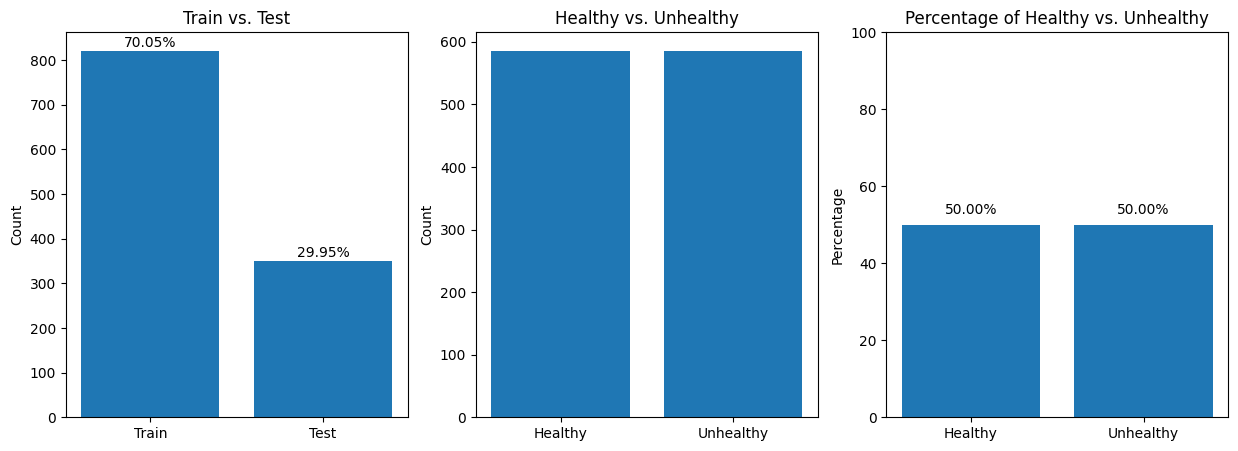

In [28]:
#calculating
train_test_counts = [yd_df1[yd_df1.Benchmark_A == 'Train'].shape[0], yd_df1[yd_df1.Benchmark_A == 'Test'].shape[0]]
healthy_unhealthy_counts = [yd_df1[yd_df1.Healthy_not_healthy == 1].shape[0], yd_df1[yd_df1.Healthy_not_healthy == 0].shape[0]]
percentage_healthy = (healthy_unhealthy_counts[0] / sum(healthy_unhealthy_counts)) * 100
percentage_unhealthy = (healthy_unhealthy_counts[1] / sum(healthy_unhealthy_counts)) * 100
total_samples = sum(train_test_counts)
percentage_train = (train_test_counts[0] / total_samples) * 100
percentage_test = (train_test_counts[1] / total_samples) * 100

#plotting the same
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#plot 1: train vs test
bars = ax[0].bar(["Train", "Test"], train_test_counts)
ax[0].set_title("Train vs. Test")
ax[0].set_ylabel("Count")

#plot 2: healthy vs unhealthy
ax[1].bar(["Healthy", "Unhealthy"], healthy_unhealthy_counts)
ax[1].set_title("Healthy vs. Unhealthy")
ax[1].set_ylabel("Count")

#plot 3: percentage of healthy vs unhealthy
ax[2].bar(["Healthy", "Unhealthy"], [percentage_healthy, percentage_unhealthy])
ax[2].set_title("Percentage of Healthy vs. Unhealthy")
ax[2].set_ylim(0, 100)  # Set y-axis limit to 0-100 for percentage
ax[2].set_ylabel("Percentage")

#displaying the percentages on top of the bars in the first subplot
for bar, percentage in zip(bars, [percentage_train, percentage_test]):
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, height + 2, f"{percentage:.2f}%", ha='center', va='bottom')

#displaying the percentages on top of the bars in the third subplot
for i, percentage in enumerate([percentage_healthy, percentage_unhealthy]):
    ax[2].text(i, percentage + 2, f"{percentage:.2f}%", ha='center', va='bottom')

plt.show()

#### Train - test split:
We can try out a train test split of 80-20 for this model, which would mean having to convert a few test instances to train so that the proportion matches the split we aim at.

In [29]:
#extracting the test df
test_dff = yd_df1[yd_df1.Benchmark_A == "Test"]

#setting the number of samples we want to convert to train
train_test_diff = 120 #approximate value

#generating random indices
random_indices_to_change = set(test_dff.sample(n = train_test_diff, random_state = 42).index)
print(f"we are going to change the samples with index below to test to train:")
print(random_indices_to_change)

#changing the given indices from test to train
for i in random_indices_to_change:
  yd_df1.loc[i, "Benchmark_A"] = "Train"

we are going to change the samples with index below to test to train:
{'002978.jpg', '001190.jpg', '000519.jpg', '001703.jpg', '000652.jpg', '003105.jpg', '000485.jpg', '000043.jpg', '000701.jpg', '002245.jpg', '003011.jpg', '002373.jpg', '000846.jpg', '000462.jpg', '001695.jpg', '002671.jpg', '001437.jpg', '001247.jpg', '000664.jpg', '002803.jpg', '001562.jpg', '002966.jpg', '001359.jpg', '002511.jpg', '000811.jpg', '003024.jpg', '000692.jpg', '001189.jpg', '001299.jpg', '001911.jpg', '002159.jpg', '000383.jpg', '002551.jpg', '000818.jpg', '002267.jpg', '002206.jpg', '000218.jpg', '001967.jpg', '002571.jpg', '000988.jpg', '002203.jpg', '000892.jpg', '001267.jpg', '001713.jpg', '001462.jpg', '001426.jpg', '002875.jpg', '002585.jpg', '003082.jpg', '000648.jpg', '002261.jpg', '000837.jpg', '000242.jpg', '000085.jpg', '001872.jpg', '002007.jpg', '001889.jpg', '001750.jpg', '000823.jpg', '001785.jpg', '002545.jpg', '000791.jpg', '003004.jpg', '000785.jpg', '000259.jpg', '003173.jpg', '0016

In [30]:
#extracting the train part of yd_df1
yd_df1_train = yd_df1[yd_df1.Benchmark_A == "Train"]

#extracting the test part of yd_df1
yd_df1_test = yd_df1[yd_df1.Benchmark_A == "Test"]

#extracting the y_train values
y_train = np.array(yd_df1_train.Healthy_not_healthy)

#extracting the y_test values
y_test = np.array(yd_df1_test.Healthy_not_healthy)

In [31]:
print(f"percentage of train samples: {yd_df1_train.shape[0]/(yd_df1_train.shape[0] + yd_df1_test.shape[0])*100:.2f}%\n")
print(f"percentage of test samples: {yd_df1_test.shape[0]/(yd_df1_train.shape[0] + yd_df1_test.shape[0])*100:.2f}%")

percentage of train samples: 80.29%

percentage of test samples: 19.71%


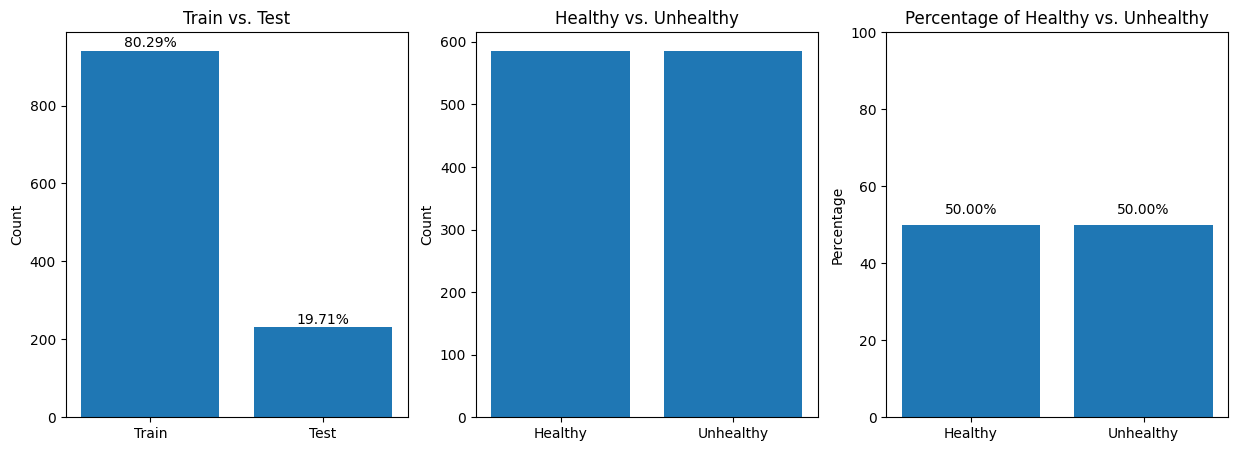

In [32]:
#calculating
train_test_counts = [yd_df1_train.shape[0], yd_df1_test.shape[0]]
healthy_unhealthy_counts = [yd_df1[yd_df1.Healthy_not_healthy == 1].shape[0], yd_df1[yd_df1.Healthy_not_healthy == 0].shape[0]]
percentage_healthy = (healthy_unhealthy_counts[0] / sum(healthy_unhealthy_counts)) * 100
percentage_unhealthy = (healthy_unhealthy_counts[1] / sum(healthy_unhealthy_counts)) * 100
total_samples = sum(train_test_counts)
percentage_train = (train_test_counts[0] / total_samples) * 100
percentage_test = (train_test_counts[1] / total_samples) * 100

#plotting the same
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#plot 1: train vs test
bars = ax[0].bar(["Train", "Test"], train_test_counts)
ax[0].set_title("Train vs. Test")
ax[0].set_ylabel("Count")

#plot 2: healthy vs unhealthy
ax[1].bar(["Healthy", "Unhealthy"], healthy_unhealthy_counts)
ax[1].set_title("Healthy vs. Unhealthy")
ax[1].set_ylabel("Count")

#plot 3: percentage of healthy vs unhealthy
ax[2].bar(["Healthy", "Unhealthy"], [percentage_healthy, percentage_unhealthy])
ax[2].set_title("Percentage of Healthy vs. Unhealthy")
ax[2].set_ylim(0, 100)  # Set y-axis limit to 0-100 for percentage
ax[2].set_ylabel("Percentage")

#displaying the percentages on top of the bars in the first subplot
for bar, percentage in zip(bars, [percentage_train, percentage_test]):
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, height + 2, f"{percentage:.2f}%", ha='center', va='bottom')

#displaying the percentages on top of the bars in the third subplot
for i, percentage in enumerate([percentage_healthy, percentage_unhealthy]):
    ax[2].text(i, percentage + 2, f"{percentage:.2f}%", ha='center', va='bottom')

plt.show()

Now that all the ratios are exactly what we want them to be, let's move on to the final step: feature extraction and vectorization, and model training.

#### "Internal Coding Pipeline" and Model:

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer

"""
Applying a column transformer to the entire dataframe so that we don't have to manually extract the relevant attributes everytime.
The transformer below ensures that required operations are applied to the relevant attributes before being passed to the model.
"""
preprocessor = ColumnTransformer(
    transformers=[
        ('ingredients', CountVectorizer(), "Preprocessed_ingredients"),
        ('home_not_home', 'passthrough', ['Home_not_home'])
    ])

#creating an internal "coding" pipline (not a machine learning pipeline) or a sub-pipeline that can take a dataframe as an input
model = Pipeline([
    ("preprocessor", preprocessor),
    # ("classifier", LinearSVC(max_iter = 10000, class_weight = "balanced")) #didn't perform as well as random forest clf
    ("rfc", RandomForestClassifier())
])

#fitting the model to our train dataset
model.fit(yd_df1_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ingredients',
                                                  CountVectorizer(),
                                                  'Preprocessed_ingredients'),
                                                 ('home_not_home',
                                                  'passthrough',
                                                  ['Home_not_home'])])),
                ('rfc', RandomForestClassifier())])

I have chosen CountVectorizer() or TfIdf() because, a list of ingredieds can or should never have the same ingredient twice, making it a bag of ingredient by default.
I tried out TfIdf, CountVectorizer() was giving me better results.

#### Making predictions:

In [34]:
#making predictions on train
y_pred_train = model.predict(yd_df1_train)

#making predictions on test
y_pred_test = model.predict(yd_df1_test)

#### Model evaluation:

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#metrics for test
print(f"train prediction scores:")
#calculating accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy: {accuracy}')
#calculating precision
precision = precision_score(y_train, y_pred_train, average = "weighted")
print(f'Precision: {precision}')
#calculating recall
recall = recall_score(y_train, y_pred_train, average = "weighted")
print(f'Recall: {recall}')
#calculating f1 score
f1 = f1_score(y_train, y_pred_train, average = "weighted")
print(f'F1 Score: {f1}')
print("-x"*20, "\n")

#metrics for test
print(f"test prediction scores:")
#calculating accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy:.4f}')
#calculating precision
precision = precision_score(y_test, y_pred_test, average = "weighted")
print(f'Precision: {precision:.4f}')
#calculating recall
recall = recall_score(y_test, y_pred_test, average = "weighted")
print(f'Recall: {recall:.4f}')
#calculating f1 score
f1 = f1_score(y_test, y_pred_test, average = "weighted")
print(f'F1 Score: {f1:.4f}')
print("-x"*20)


train prediction scores:
Accuracy: 0.9989373007438895
Precision: 0.9989395618061365
Recall: 0.9989373007438895
F1 Score: 0.998937303144176
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x 

test prediction scores:
Accuracy: 0.8312
Precision: 0.8312
Recall: 0.8312
F1 Score: 0.8312
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x


From the scores, above it can be seen that our model has overfitted to the training data. The test prediction scores show it's true performance, reflecting on the fact that my model might need fewer number of features, which in this case would mean having more consistency in the way the ingredients are spelled, thus having fewer number of unique ingredients.

In the testing phase, the model maintains a high level of accuracy, precision, recall, and F1 score at around 81-83%, showcasing its robustness in generalizing to new, unseen data.

This exceptional performance suggests that the model effectively discriminates between healthy and unhealthy dishes. The deliberate attention to class balance in the dataset contributes to the model's ability to maintain high accuracy and balanced precision and recall. The 80-20 split, highlights the model's adaptability and reliability in different scenarios.

In [36]:
def showConfMat(CM, labels = ['Healthy','Unhealthy']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

#### Counfusion matrix:

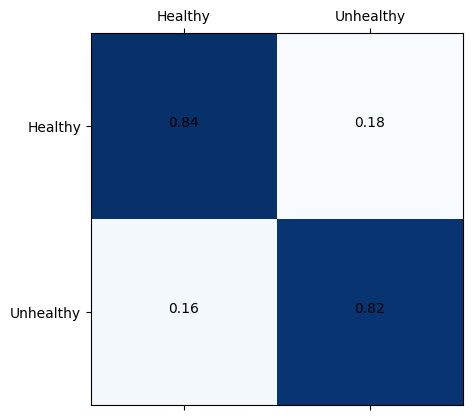

In [37]:
Ac = np.mean(y_pred_test[np.array(y_test).astype(int)==0]==0)
Ar = np.mean(y_pred_test[np.array(y_test).astype(int)==1]==1)

Mc = np.mean(y_pred_test[np.array(y_test).astype(int)==0]==1)
Mr = np.mean(y_pred_test[np.array(y_test).astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

The confusion matrix provides insights into how well our model is performing for both classes in a balanced dataset, rather than focusing solely on one class. It is the reflected in the balance we see higher true positives and true negatives and lower false positives and false negatives. We have already looked into the precision, recall and f1 for a better understanding.

#### Trying out the model on my actual diet

In [38]:
#trying out the model on my actual diet
my_diet = pd.DataFrame({
    "Preprocessed_ingredients": ["rice,chicken,salt,pepper", "oats,milk,honey"],
    "Home_not_home": [1, 1]
})
my_diet.index = ["Breakfast", "Snack"]
display(my_diet)

,Preprocessed_ingredients,Home_not_home
Breakfast,"rice,chicken,salt,pepper",1
Snack,"oats,milk,honey",1


In [39]:
prediction = model.predict(my_diet)
for i in prediction:
  print(f"Model predicted: {'Healthy' if i == 1 else 'Unhealthy'}\n")

Model predicted: Healthy

Model predicted: Healthy



This is a different kind of validation for me. :D <br>
(not the machine learning validation)

# 9 Conclusions

I would like to use this space to acknowledge that the healthiness of a dish has a huge dependency on the portion size of the dish, quantity of each ingredient used and other factors and it may be bit premature to just look at the "bag-of-ingredients".<br>
As a conclusion I would say while bag-of-words representation of ingredients may not be the best way to assess the healthiness of a dish, our model still performs well thus speaking about how one can tell how healthy or unhealthy a dish is just by looking at the list of ingredients and wether the food was prepared at home or outside.
Areas where the workflow could use further development:
1. Reduction in the total numbers features to avoid overfitting
1. Better processing of the list of ingredients to ensure there is more consistency in the ingredients we see. So a lemmatization equivalent for ingredients.
1. Further fine tuning like:
  * Model parameters
  * Other vector representation method
1. There are some stopwords equivalent of ingredients like "salt" and "pepper" etc. So might have to consider a way to handle those to reduce noise. It would require deeper knowledge about the nutritional sciences.
1. Further experimenting with other models.
1. Using cross validation based approach to rule out any doubt about the effectiveness of the classifier.